In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import (
    units as pyunits,
    units
)
import parameter_sweep as ps

In [2]:
import pyomo.environ as pyo
import idaes.logger as idaeslog
import idaes.core.util.scaling as iscale
from idaes.core.util.tables import (
    create_stream_table_dataframe,
    stream_table_dataframe_to_string,
)

# Set up logger
_log = idaeslog.getLogger(__name__)

In [3]:
from BSM2_electroNH4 import main, build_flowsheet, set_operating_conditions, initialize_system, solve, add_costing
# from BSM2_electroNP_no_bioP import main, build_flowsheet, set_operating_conditions, initialize_system, solve
from plot_network import plot_network

DOF before feed: 129
2024-10-04 23:36:42 [WARNING] idaes.core.util.scaling: Trying to get scaling factor for unnamed expr 
2024-10-04 23:36:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.volume
2024-10-04 23:36:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R1]
2024-10-04 23:36:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R2]
2024-10-04 23:36:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R3]
2024-10-04 23:36:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R4]
2024-10-04 23:36:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate_reaction_extent[0.0,R5]
2024-10-04 23:36:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.R1.control_volume.rate

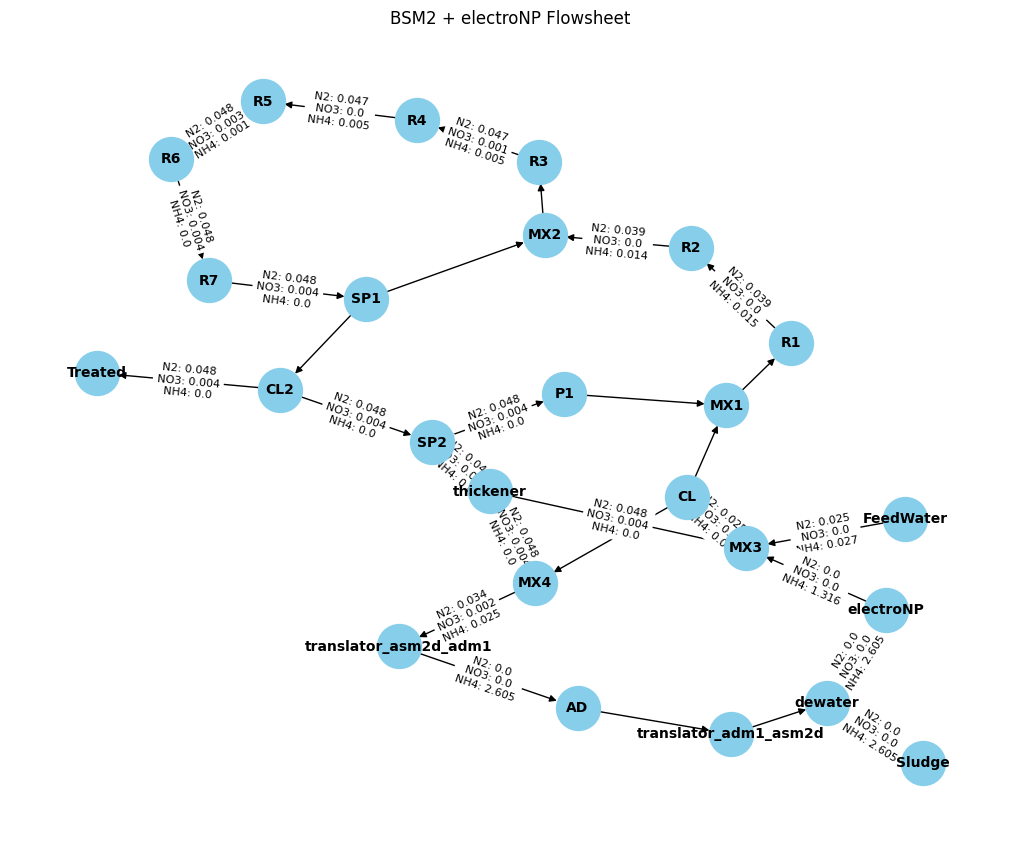

In [4]:
if __name__ == "__main__":
    # This method builds and runs a steady state activated sludge flowsheet.
    m, results = main(has_electroNP=True)
    if m.fs.has_electroNP is False:
        stream_table = create_stream_table_dataframe(
            {
                "Feed": m.fs.FeedWater.outlet,
                "R1": m.fs.R1.outlet,
                "R2": m.fs.R2.outlet,
                "R3": m.fs.R3.outlet,
                "R4": m.fs.R4.outlet,
                "R5": m.fs.R5.outlet,
                "R6": m.fs.R6.outlet,
                "R7": m.fs.R7.outlet,
                "SP2": m.fs.SP2.recycle,
                "CL2": m.fs.CL2.effluent,
                "thickener outlet": m.fs.thickener.underflow,
                "ADM-ASM translator outlet": m.fs.translator_adm1_asm2d.outlet,
                "dewater outlet": m.fs.dewater.overflow,
                "Treated water": m.fs.Treated.inlet,
                "Sludge": m.fs.Sludge.inlet,
                "MX4": m.fs.MX4.outlet,
                "MX3": m.fs.MX3.outlet,
            },
            time_point=0,
        )
    else:
        stream_table = create_stream_table_dataframe(
            {
                "Feed": m.fs.FeedWater.outlet,
                "R1": m.fs.R1.outlet,
                "R2": m.fs.R2.outlet,
                "R3": m.fs.R3.outlet,
                "R4": m.fs.R4.outlet,
                "R5": m.fs.R5.outlet,
                "R6": m.fs.R6.outlet,
                "R7": m.fs.R7.outlet,
                "SP2": m.fs.SP2.recycle,
                "CL2": m.fs.CL2.effluent,
                "thickener outlet": m.fs.thickener.underflow,
                "ADM-ASM translator outlet": m.fs.translator_adm1_asm2d.outlet,
                "dewater outlet": m.fs.dewater.overflow,
                "electroNP treated": m.fs.electroNP.treated,
                "electroNP byproduct": m.fs.electroNP.byproduct,
                "Treated water": m.fs.Treated.inlet,
                "Sludge": m.fs.Sludge.inlet,
                "MX4": m.fs.MX4.outlet,
                "MX3": m.fs.MX3.outlet,
            },
            time_point=0,
        )
    print(stream_table_dataframe_to_string(stream_table))

plot_network(m, stream_table)

In [5]:
from parameter_sweep import (
    LinearSample,
    parameter_sweep,
)

def set_up_sensitivity(m):
    outputs = {}
    optimize_kwargs = {}
    opt_function = solve  
    outputs["Electricity Intensity"] = m.fs.costing.electricity_intensity
    return outputs, optimize_kwargs, opt_function

def run_analysis(case_num=1, nx=2, interpolate_nan_outputs=True, output_filename=None):
    if output_filename is None:
        output_filename = "sensitivity_" + str(case_num) + ".csv"

    outputs, optimize_kwargs, opt_function = set_up_sensitivity(m)

    sweep_params = {}
    sweep_params["N_removal"] = LinearSample(
        m.fs.electroNP.N_removal, 0.1, 1.0, nx
    )
    sweep_params["N_removal_intensity"] = LinearSample(
        m.fs.electroNP.energy_electric_flow_mass, 0.1, 1.0, nx
    )
    global_results = parameter_sweep(
        sweep_params,
        output_dict={"outputs": outputs},
        csv_results_file_name=output_filename,
        optimize_function=opt_function,
        optimize_kwargs=optimize_kwargs,
        interpolate_nan_outputs=interpolate_nan_outputs,
        model=m
    )

    return global_results, sweep_params, m

results, sweep_params, model = run_analysis()


is deprecated                                 and will not work with future
implementations of parallelism.  (deprecated in 0.10.0) (called from
/Users/dalywettermark/opt/anaconda3/envs/watertap/lib/python3.12/site-
packages/parameter_sweep/functions.py:170)
function is deprecated                                 and will not work with
future implementations of parallelism.  (deprecated in 0.10.0) (called from
/Users/dalywettermark/opt/anaconda3/envs/watertap/lib/python3.12/site-
packages/parameter_sweep/functions.py:170)
function is deprecated                                 and will not work with
future implementations of parallelism.  (deprecated in 0.10.0) (called from
/Users/dalywettermark/opt/anaconda3/envs/watertap/lib/python3.12/site-
packages/parameter_sweep/functions.py:170)
ipopt-watertap: ipopt with user variable scaling and IDAES jacobian constraint scaling
Ipopt 3.14.16: tol=1e-08
constr_viol_tol=1e-08
acceptable_constr_viol_tol=1e-08
bound_relax_factor=0.0
honor_original_

/Users/dalywettermark/opt/anaconda3/envs/watertap/lib/python3.12/site-packages/parameter_sweep/writer.py:129: UserWarning: Too few points to perform interpolation.
  warnings.warn("Too few points to perform interpolation.")


In [6]:
# create dataframe of results
df_results = pd.DataFrame()
# df_results["Feed Flow (m3/d)"] = results[1]["sweep_params"]["feed_flow"]["value"]
df_results["N_removal"] = results[1]["sweep_params"]["N_removal"]["value"]
df_results["N_removal_intensity"] = results[1]["sweep_params"]["N_removal_intensity"]["value"]
df_results["Electricity Intensity"] = results[1]["outputs"]["Electricity Intensity"]["value"]

df_results

,N_removal,N_removal_intensity,Electricity Intensity
0,0.10,0.10,NaN
1,0.10,0.55,NaN
2,0.10,1.00,NaN
3,0.55,0.10,NaN
4,0.55,0.55,NaN
5,0.55,1.00,NaN
6,1.00,0.10,NaN
7,1.00,0.55,NaN
8,1.00,1.00,NaN


In [7]:
pivot_df = df_results.pivot(index="N_removal", columns="N_removal_intensity", values="Electricity Intensity")
pivot_df = pivot_df.round(2)
# round index and column names to 2 decimal
pivot_df.index = pivot_df.index.round(2)
pivot_df.columns = pivot_df.columns.round(2)

/Users/dalywettermark/opt/anaconda3/envs/watertap/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/dalywettermark/opt/anaconda3/envs/watertap/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


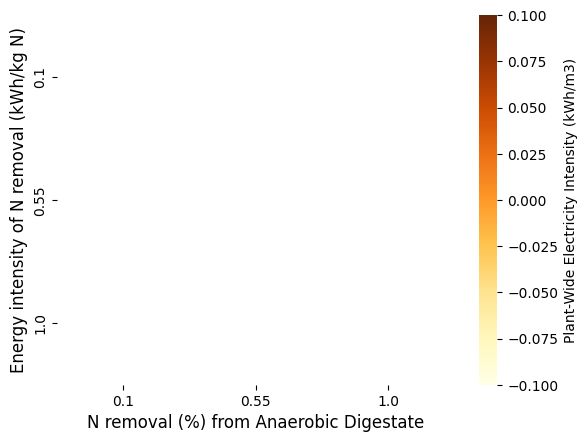

In [8]:
heatmap = sns.heatmap(pivot_df, annot=True, cmap='YlOrBr', cbar_kws={'label': 'Plant-Wide Electricity Intensity (kWh/m3)'})
plt.xlabel("N removal (%) from Anaerobic Digestate", fontsize=12)
plt.ylabel("Energy intensity of N removal (kWh/kg N)", fontsize=12)
plt.show()
